# 앙상블(Ensemble)

* 일반화와 강건성(Robustness)을 향상시키기 위해 여러 모델의 예측 값을 결합하는 방법
* 앙상블에는 크게 두가지 종류가 존재
  * 평균 방법
    * 여러개의 추정값을 독립적으로 구한뒤 평균을 취함
    * 결합 추정값은 분산이 줄어들기 때문에 단일 추정값보다 좋은 성능을 보임
  * 부스팅 방법
    * 순차적으로 모델 생성
    * 결합된 모델의 편향을 감소 시키기 위해 노력
    * 부스팅 방법의 목표는 여러개의 약한 모델들을 결합해 하나의 강력한 앙상블 모델을 구축하는 것

## Bagging meta-estimator

* bagging은 bootstrap aggregating의 줄임말
* 원래 훈련 데이터셋의 일부를 사용해 여러 모델을 훈련
* 각각의 결과를 결합해 최종 결과를 생성
* 분산을 줄이고 과적합을 막음
* 강력하고 복잡한 모델에서 잘 동작

In [37]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer
from sklearn.datasets import load_boston, load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [4]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

### Bagging을 사용한 분류

#### 데이터셋 불러오기

In [5]:
iris = load_iris()
wine = load_wine()
cancer = load_breast_cancer()

#### KNN

##### 붓꽃 데이터

In [6]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [8]:
cross_val = cross_validate(
    estimator = base_model,
    X=iris.data, y=iris.target, cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0024726390838623047 (+/- 0.0014027510470996695)
avg score time: 0.0022305011749267577 (+/- 0.0004406059871209519)
avg test time: 0.96 (+/- 0.024944382578492935)


In [9]:
cross_val = cross_validate(
    estimator = bagging_model,
    X=iris.data, y=iris.target, cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.06940207481384278 (+/- 0.018130957705761848)
avg score time: 0.023288154602050783 (+/- 0.01194527371103612)
avg test time: 0.9466666666666665 (+/- 0.03399346342395189)


##### 와인 데이터

In [10]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [11]:
cross_val = cross_validate(
    estimator = base_model,
    X=wine.data, y=wine.target, cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0015802860260009765 (+/- 0.00036934439020437464)
avg score time: 0.002906942367553711 (+/- 0.0010165095116088892)
avg test time: 0.9493650793650794 (+/- 0.037910929811115976)


In [12]:
cross_val = cross_validate(
    estimator = bagging_model,
    X=wine.data, y=wine.target, cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.024590444564819337 (+/- 0.0033847366781216736)
avg score time: 0.009555673599243164 (+/- 0.00042413864053125305)
avg test time: 0.9609523809523809 (+/- 0.028267341226138717)


##### 유방암 데이터

In [13]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [14]:
cross_val = cross_validate(
    estimator = base_model,
    X=cancer.data, y=cancer.target, cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0021486282348632812 (+/- 0.0001990889644092697)
avg score time: 0.009038114547729492 (+/- 0.002827336009874182)
avg test time: 0.9648501785437045 (+/- 0.009609970350036127)


In [15]:
cross_val = cross_validate(
    estimator = bagging_model,
    X=cancer.data, y=cancer.target, cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.07114586830139161 (+/- 0.024461427829484822)
avg score time: 0.050589799880981445 (+/- 0.00864869238717383)
avg test time: 0.9613569321533924 (+/- 0.02188635255516712)


#### SVC

##### 붓꽃 데이터

In [16]:
base_model = make_pipeline(
    StandardScaler(),
    SVC()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [17]:
cross_val = cross_validate(
    estimator = base_model,
    X=iris.data, y=iris.target, cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.005458927154541016 (+/- 0.004912945785750461)
avg score time: 0.0013762950897216798 (+/- 0.0005703393137604537)
avg test time: 0.9666666666666666 (+/- 0.02108185106778919)


In [19]:
cross_val = cross_validate(
    estimator = bagging_model,
    X=iris.data, y=iris.target, cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.03607635498046875 (+/- 0.005008251715731594)
avg score time: 0.005995750427246094 (+/- 0.0026450484897707453)
avg test time: 0.9200000000000002 (+/- 0.045215533220835116)


##### 와인 데이터

In [20]:
base_model = make_pipeline(
    StandardScaler(),
    SVC()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [21]:
cross_val = cross_validate(
    estimator = base_model,
    X=wine.data, y=wine.target, cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0034018993377685548 (+/- 0.0008573590793981583)
avg score time: 0.001349639892578125 (+/- 0.0008457922854803472)
avg test time: 0.9833333333333334 (+/- 0.022222222222222233)


In [22]:
cross_val = cross_validate(
    estimator = bagging_model,
    X=wine.data, y=wine.target, cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.03105325698852539 (+/- 0.0023807020885707815)
avg score time: 0.004454946517944336 (+/- 0.00045964360650019667)
avg test time: 0.9553968253968254 (+/- 0.03761067484347909)


##### 유방암 데이터

In [23]:
base_model = make_pipeline(
    StandardScaler(),
    SVC()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [24]:
cross_val = cross_validate(
    estimator = base_model,
    X=cancer.data, y=cancer.target, cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.00827183723449707 (+/- 0.003573372876614804)
avg score time: 0.0023469924926757812 (+/- 0.0002561874364371623)
avg test time: 0.9736376339077782 (+/- 0.014678541667933545)


In [25]:
cross_val = cross_validate(
    estimator = bagging_model,
    X=cancer.data, y=cancer.target, cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.050931024551391604 (+/- 0.013057361595069187)
avg score time: 0.012276268005371094 (+/- 0.0024958021983390076)
avg test time: 0.9701288619779538 (+/- 0.004260169567686681)


#### Decision Tree

##### 붓꽃 데이터

In [26]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [27]:
cross_val = cross_validate(
    estimator = base_model,
    X=iris.data, y=iris.target, cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0022630214691162108 (+/- 0.0004603555783666046)
avg score time: 0.0007157802581787109 (+/- 0.0001550004199591424)
avg test time: 0.9600000000000002 (+/- 0.03265986323710903)


In [28]:
cross_val = cross_validate(
    estimator = bagging_model,
    X=iris.data, y=iris.target, cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.030117034912109375 (+/- 0.003461183175419037)
avg score time: 0.003519582748413086 (+/- 0.0011422214498358306)
avg test time: 0.9533333333333334 (+/- 0.04521553322083511)


##### 와인 데이터

In [29]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [30]:
cross_val = cross_validate(
    estimator = base_model,
    X=wine.data, y=wine.target, cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.003172445297241211 (+/- 0.0016010690857870828)
avg score time: 0.0008048534393310547 (+/- 0.00033030848971532864)
avg test time: 0.8931746031746031 (+/- 0.04124419227384009)


In [31]:
cross_val = cross_validate(
    estimator = bagging_model,
    X=wine.data, y=wine.target, cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.03336224555969238 (+/- 0.00664920431074989)
avg score time: 0.002989530563354492 (+/- 0.00014380471112983317)
avg test time: 0.9607936507936508 (+/- 0.028521119729020605)


##### 유방암 데이터

In [32]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [33]:
cross_val = cross_validate(
    estimator = base_model,
    X=cancer.data, y=cancer.target, cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.010344791412353515 (+/- 0.0021338717517718074)
avg score time: 0.0008011817932128906 (+/- 9.17863349145492e-05)
avg test time: 0.9173730787144854 (+/- 0.016419724269949428)


In [34]:
cross_val = cross_validate(
    estimator = bagging_model,
    X=cancer.data, y=cancer.target, cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.04129462242126465 (+/- 0.0032372503586858875)
avg score time: 0.0039053916931152343 (+/- 0.0007019898372854199)
avg test time: 0.9420121099208197 (+/- 0.0188702698158311)


### Bagging을 사용한 회귀

#### 데이터셋 불러오기

In [38]:
boston = load_boston()
diabetes = load_diabetes()

#### KNN

##### 보스턴 주택 가격 데이터

In [42]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [43]:
cross_val = cross_validate(
    estimator = base_model,
    X=boston.data, y=boston.target, cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.00349278450012207 (+/- 0.001510929257557286)
avg score time: 0.00482025146484375 (+/- 0.001688159916525635)
avg test time: 0.47357748833823543 (+/- 0.13243123464477455)


In [45]:
cross_val = cross_validate(
    estimator = bagging_model,
    X=boston.data, y=boston.target, cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.04270167350769043 (+/- 0.0042863905580978285)
avg score time: 0.020929765701293946 (+/- 0.002667156684150688)
avg test time: 0.49308493466021214 (+/- 0.10105861125829821)


##### 당뇨병 데이터

In [46]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [47]:
cross_val = cross_validate(
    estimator = base_model,
    X=diabetes.data, y=diabetes.target, cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.002164316177368164 (+/- 0.0007710753560771056)
avg score time: 0.002364826202392578 (+/- 0.0005297682373250279)
avg test time: 0.3689720650295623 (+/- 0.044659049060165365)


In [48]:
cross_val = cross_validate(
    estimator = bagging_model,
    X=diabetes.data, y=diabetes.target, cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.026999664306640626 (+/- 0.0032030961652998787)
avg score time: 0.011183214187622071 (+/- 0.0016257868772174076)
avg test time: 0.4066792617572723 (+/- 0.03712033448571985)


#### SVR

##### 보스턴 주택 가격 데이터

In [49]:
base_model = make_pipeline(
    StandardScaler(),
    SVR()
)

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [50]:
cross_val = cross_validate(
    estimator = base_model,
    X=boston.data, y=boston.target, cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.03276357650756836 (+/- 0.007253141070536311)
avg score time: 0.009419918060302734 (+/- 0.0028318147437487117)
avg test time: 0.17631266230186618 (+/- 0.5224914915128981)


In [51]:
cross_val = cross_validate(
    estimator = bagging_model,
    X=boston.data, y=boston.target, cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.10178742408752442 (+/- 0.007784445402380435)
avg score time: 0.03433084487915039 (+/- 0.005219844607094338)
avg test time: 0.14815909378452657 (+/- 0.3508200762042857)


##### 당뇨병 데이터

In [ ]:
base_model = make_pipeline(
    StandardScaler(),
    SVR()
)

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [52]:
cross_val = cross_validate(
    estimator = base_model,
    X=boston.data, y=boston.target, cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.03647923469543457 (+/- 0.013354843414419715)
avg score time: 0.01007843017578125 (+/- 0.005054333489195808)
avg test time: 0.17631266230186618 (+/- 0.5224914915128981)


In [53]:
cross_val = cross_validate(
    estimator = bagging_model,
    X=boston.data, y=boston.target, cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.06404051780700684 (+/- 0.0038159223395402724)
avg score time: 0.02327618598937988 (+/- 0.006129449770270982)
avg test time: 0.18459341830191117 (+/- 0.28054842888580545)


#### Decision Tree

##### 보스턴 주택 가격 데이터

In [54]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeRegressor()
)

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [55]:
cross_val = cross_validate(
    estimator = base_model,
    X=boston.data, y=boston.target, cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.00921173095703125 (+/- 0.0017995655150398141)
avg score time: 0.0017331600189208984 (+/- 0.00016802002614406479)
avg test time: 0.09001207424235096 (+/- 0.9428419491335425)


In [56]:
cross_val = cross_validate(
    estimator = bagging_model,
    X=boston.data, y=boston.target, cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.08863329887390137 (+/- 0.027237418578562027)
avg score time: 0.010033893585205077 (+/- 0.007853084751993006)
avg test time: 0.4277191138243448 (+/- 0.2919664011143291)


##### 당뇨병 데이터

In [57]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeRegressor()
)

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [58]:
cross_val = cross_validate(
    estimator = base_model,
    X=diabetes.data, y=diabetes.target, cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.013801860809326171 (+/- 0.00483255334550027)
avg score time: 0.0029831886291503905 (+/- 0.0029379251882870917)
avg test time: -0.19649148090317164 (+/- 0.11916589864843116)


In [59]:
cross_val = cross_validate(
    estimator = bagging_model,
    X=diabetes.data, y=diabetes.target, cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.10479183197021484 (+/- 0.0186096496790612)
avg score time: 0.009148454666137696 (+/- 0.005517263933147546)
avg test time: 0.33480085475321364 (+/- 0.07387919251711834)


## Forests of randomized trees

* `sklearn.ensemble` 모듈에는 무작위 결정 트리를 기반으로하는 두 개의 평균화 알고리즘이 존재
  * Random Forest
  * Extra-Trees
* 모델 구성에 임의성을 추가해 다양한 모델 집합이 생성
* 앙상블 모델의 예측은 각 모델의 평균

In [76]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

### Random Forests 분류

In [61]:
model = make_pipeline(
    StandardScaler(),
    RandomForestClassifier()
)

In [63]:
cross_val = cross_validate(
    estimator = model,
    X=iris.data, y=iris.target, cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.23723163604736328 (+/- 0.02065578799422438)
avg score time: 0.016447162628173827 (+/- 0.000785915412676382)
avg test time: 0.96 (+/- 0.024944382578492935)


In [64]:
cross_val = cross_validate(
    estimator = model,
    X=wine.data, y=wine.target, cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.27336668968200684 (+/- 0.0410065266653825)
avg score time: 0.018570804595947267 (+/- 0.0035219507250863003)
avg test time: 0.972063492063492 (+/- 0.02484722784679302)


In [65]:
cross_val = cross_validate(
    estimator = model,
    X=cancer.data, y=cancer.target, cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.3765162467956543 (+/- 0.03938812622931968)
avg score time: 0.019184446334838866 (+/- 0.0022082742130329664)
avg test time: 0.9613414066138798 (+/- 0.023265527334176927)


### Random Forests 회귀

In [66]:
model = make_pipeline(
    StandardScaler(),
    RandomForestRegressor()
)

In [67]:
cross_val = cross_validate(
    estimator = model,
    X=boston.data, y=boston.target, cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.6158501148223877 (+/- 0.07918460714649968)
avg score time: 0.017474365234375 (+/- 0.0024797414258910687)
avg test time: 0.625993037086315 (+/- 0.20191587352399729)


In [68]:
cross_val = cross_validate(
    estimator = model,
    X=diabetes.data, y=diabetes.target, cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.5237602710723877 (+/- 0.06780017608950994)
avg score time: 0.02160029411315918 (+/- 0.008469749733474152)
avg test time: 0.4258000396624528 (+/- 0.05243850480283449)


### Extremely Randomized Trees 분류

In [69]:
model = make_pipeline(
    StandardScaler(),
    ExtraTreesClassifier()
)

In [70]:
cross_val = cross_validate(
    estimator = model,
    X=iris.data, y=iris.target, cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.10111145973205567 (+/- 0.008879157880315682)
avg score time: 0.01375722885131836 (+/- 0.0027226771941976542)
avg test time: 0.9533333333333334 (+/- 0.03399346342395189)


In [71]:
cross_val = cross_validate(
    estimator = model,
    X=wine.data, y=wine.target, cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.09943552017211914 (+/- 0.006751464059950708)
avg score time: 0.011211872100830078 (+/- 0.0009402898208116302)
avg test time: 0.9833333333333332 (+/- 0.022222222222222233)


In [72]:
cross_val = cross_validate(
    estimator = model,
    X=cancer.data, y=cancer.target, cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.13567304611206055 (+/- 0.019909778794914304)
avg score time: 0.013623809814453125 (+/- 0.001107454578124505)
avg test time: 0.9631113181183046 (+/- 0.01870575606912937)


### Extremely Randomized Trees 회귀

In [77]:
model = make_pipeline(
    StandardScaler(),
    ExtraTreesRegressor()
)

In [78]:
cross_val = cross_validate(
    estimator = model,
    X=boston.data, y=boston.target, cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.35186061859130857 (+/- 0.05055516035419745)
avg score time: 0.023381423950195313 (+/- 0.014136322021224966)
avg test time: 0.6109063145475974 (+/- 0.28936041798109235)


In [79]:
cross_val = cross_validate(
    estimator = model,
    X=diabetes.data, y=diabetes.target, cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.26775436401367186 (+/- 0.012885915942486037)
avg score time: 0.016721343994140624 (+/- 0.0033717865094170197)
avg test time: 0.43270829921258624 (+/- 0.03943014328610029)


### Random Forest, Extra Tree 시각화

* 결정 트리, Random Forest, Extra Tree의 결정 경계와 회귀식 시각화

In [81]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier

In [88]:
n_classes = 3
n_estimators = 30
cmap = plt.cm.RdYlBu
plot_step = 0.02
plot_step_coarser = 0.5
RANDOM_SEED = 13

In [89]:
from random import Random
iris = load_iris()
plot_idx = 1
models = [DecisionTreeClassifier(max_depth=None),
         RandomForestClassifier(n_estimators=n_estimators),
         ExtraTreesClassifier(n_estimators=n_estimators)]

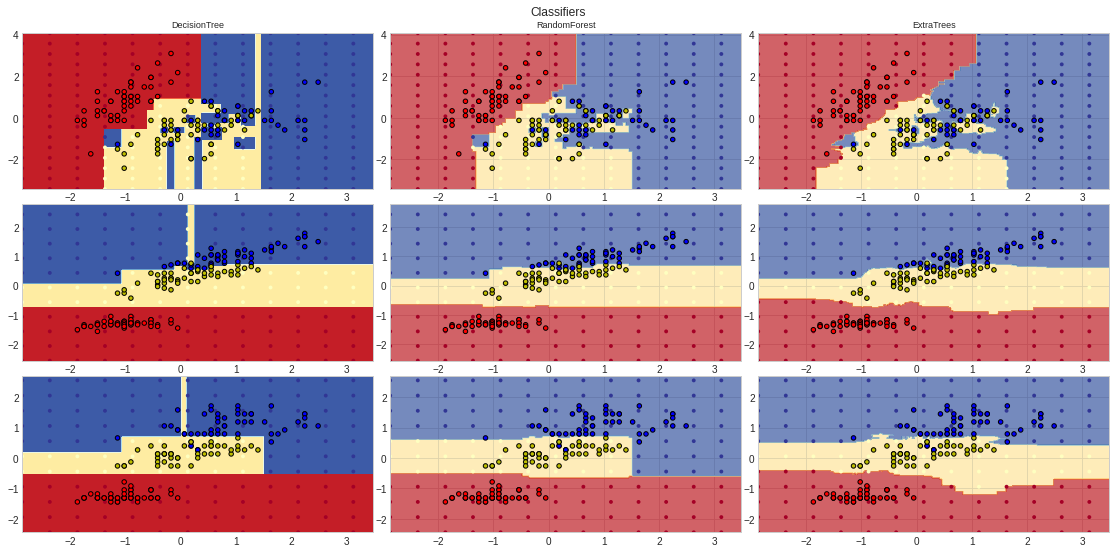

In [93]:
plt.figure(figsize=(16,8))

for pair in ([0,1],[0,2],[0,3]):
  
  for model in models:
    X = iris.data[:, pair]
    y = iris.target

    idx = np.arange(X.shape[0])
    np.random.seed(RANDOM_SEED)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]

    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean) / std

    model.fit(X, y)
    model_title = str(type(model)).split(".")[-1][:-2][:-len("Classifier")]

    plt.subplot(3, 3, plot_idx)
    if plot_idx <= len(models):
      plt.title(model_title, fontsize=9)

    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))

    if isinstance(model, DecisionTreeClassifier):
      Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
      Z = Z.reshape(xx.shape)
      cs = plt.contourf(xx, yy, Z, cmap=cmap)
    else:
      estimator_alpha = 1.0 / len(model.estimators_)
      for tree in model.estimators_:
         Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
         Z = Z.reshape(xx.shape)
         cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cmap)

    xx_coarser, yy_coarser = np.meshgrid(np.arange(x_min, x_max, plot_step_coarser), np.arange(y_min, y_max, plot_step_coarser))

    Z_points_coarser = model.predict(np.c_[xx_coarser.ravel(), yy_coarser.ravel()]).reshape(xx_coarser.shape)

    cs_points = plt.scatter(xx_coarser, yy_coarser, s=15, c=Z_points_coarser, cmap=cmap,edgecolors='none')

    plt.scatter(X[:,0], X[:,1], c=y, cmap=ListedColormap(['r','y','b']), edgecolor='k', s=20)
    plot_idx += 1
  
plt.suptitle('Classifiers', fontsize=12)
plt.axis('tight')
plt.tight_layout(h_pad=0.2, w_pad=0.2, pad=2.5)
plt.show()

In [100]:
plot_idx = 1
models = [DecisionTreeRegressor(max_depth=None), RandomForestRegressor(n_estimators=n_estimators),
          ExtraTreesRegressor(n_estimators=n_estimators)]

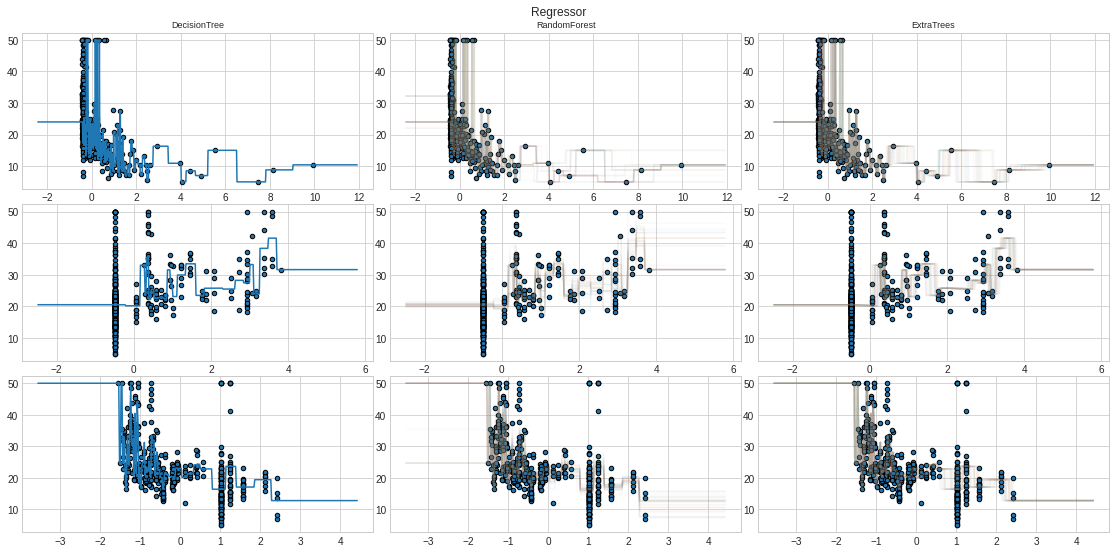

In [102]:
plt.figure(figsize=(16,8))

for pair in (0,1,2):

  for model in models:

    X = boston.data[:, pair]
    y = boston.target

    idx = np.arange(X.shape[0])
    np.random.seed(RANDOM_SEED)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]

    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean) / std

    model.fit(X.reshape(-1,1), y)

    model_title = str(type(model)).split(".")[-1][:-2][:-len('Regressor')]

    plt.subplot(3, 3, plot_idx)
    if plot_idx <= len(models):
      plt.title(model_title, fontsize=9)

    x_min, x_max = X.min()-1, X.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.arange(x_min-1, x_max+1, plot_step), np.arange(y_min-1, y_max+1, plot_step)

    if isinstance(model, DecisionTreeRegressor):
      Z = model.predict(xx.reshape(-1,1))
      cs = plt.plot(xx, Z)
    else:
      estimator_alpha = 1.0 / len(model.estimators_)
      for tree in model.estimators_:
        Z = tree.predict(xx.reshape(-1, 1))
        cs = plt.plot(xx, Z, alpha=estimator_alpha)

    plt.scatter(X,y, edgecolors='k', s=20)
    plot_idx += 1

plt.suptitle('Regressor', fontsize=12)
plt.axis('tight')
plt.tight_layout(h_pad=0.2, w_pad=0.2, pad=2.5)

## AdaBoost

* 대표적인 부스팅 알고리즘
* 일련의 약한 모델들을 학습
* 수정된 버전의 데이터를 반복 학습 (가중치가 적용된)
* 가중치 투표(또는 합)을 통해 각 모델의 예측 값을 결합
* 첫 단계에서는 원본 데이터를 학습하고 연속적인 반복마다 개별 샘플에 대한 가중치가 수정되고 다시 모델이 학습
  * 잘못 예측된 샘플은 가중치 증가, 올바르게 예측된 샘플은 가중치 감소
  * 각각의 약한 모델들은 예측하기 어려운 샘플에 집중하게 됨

![AdaBoost](https://scikit-learn.org/stable/_images/sphx_glr_plot_adaboost_hastie_10_2_0011.png)

In [103]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor

### AdaBoost 분류

In [104]:
model = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier()
)

In [105]:
cross_val = cross_validate(
    estimator = model,
    X=iris.data, y=iris.target, cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.10860042572021485 (+/- 0.017165383294800805)
avg score time: 0.013264274597167969 (+/- 0.0035055890241244983)
avg test time: 0.9466666666666667 (+/- 0.03399346342395189)


In [106]:
cross_val = cross_validate(
    estimator = model,
    X=wine.data, y=wine.target, cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.08529343605041503 (+/- 0.007237502581699466)
avg score time: 0.007341718673706055 (+/- 0.0002733802951772019)
avg test time: 0.8085714285714285 (+/- 0.16822356718459935)


In [107]:
cross_val = cross_validate(
    estimator = model,
    X=cancer.data, y=cancer.target, cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.16775431632995605 (+/- 0.0109730372884331)
avg score time: 0.009114265441894531 (+/- 0.0009428964872207415)
avg test time: 0.9701133364384411 (+/- 0.019709915473893072)


### AdaBoost 회귀

In [108]:
model = make_pipeline(
    StandardScaler(),
    AdaBoostRegressor()
)

In [109]:
cross_val = cross_validate(
    estimator = model,
    X=boston.data, y=boston.target, cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.15221037864685058 (+/- 0.005982118329297405)
avg score time: 0.0067822933197021484 (+/- 0.00012603663936001296)
avg test time: 0.5985744583807469 (+/- 0.20937548598257683)


In [110]:
cross_val = cross_validate(
    estimator = model,
    X=diabetes.data, y=diabetes.target, cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.08780608177185059 (+/- 0.015488162312292747)
avg score time: 0.004157304763793945 (+/- 0.00021624530952031265)
avg test time: 0.41312084500745616 (+/- 0.04091835944493939)


## Gradient Tree Boosting

* 임의의 차별화 가능한 손실함수로 일반화한 부스팅 알고리즘
* 웹 검색, 분류 및 회귀 등 다양한 분야에서 모두 사용 가능

In [111]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

### Gradient Tree Boosting 분류

In [112]:
model = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier()
)

In [113]:
cross_val = cross_validate(
    estimator = model,
    X=iris.data, y=iris.target, cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.40386433601379396 (+/- 0.061883894745265594)
avg score time: 0.0017532825469970704 (+/- 0.0002582428899766135)
avg test time: 0.9666666666666668 (+/- 0.02108185106778919)


In [114]:
cross_val = cross_validate(
    estimator = model,
    X=wine.data, y=wine.target, cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.46195068359375 (+/- 0.19923361491673422)
avg score time: 0.0014760017395019532 (+/- 0.00035298053495557644)
avg test time: 0.9330158730158731 (+/- 0.04127777701479872)


In [115]:
cross_val = cross_validate(
    estimator = model,
    X=cancer.data, y=cancer.target, cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.4391160011291504 (+/- 0.030281875801277995)
avg score time: 0.0012588977813720703 (+/- 0.00014574731913964405)
avg test time: 0.9596180717279925 (+/- 0.02453263202329889)


### Gradient Tree Boosting 회귀

In [116]:
model = make_pipeline(
    StandardScaler(),
    GradientBoostingRegressor()
)

In [117]:
cross_val = cross_validate(
    estimator = model,
    X=boston.data, y=boston.target, cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.1809014320373535 (+/- 0.00998765737529428)
avg score time: 0.001392507553100586 (+/- 3.256368399333195e-05)
avg test time: 0.6752372690883461 (+/- 0.16121836382662494)


In [118]:
cross_val = cross_validate(
    estimator = model,
    X=diabetes.data, y=diabetes.target, cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.14435334205627443 (+/- 0.01513196157688956)
avg score time: 0.0014035701751708984 (+/- 3.739206072197041e-05)
avg test time: 0.4029450867301339 (+/- 0.0688801507855847)


## 투표 기반 분류 (Voting Classifier)

* 서로 다른 모델들의 결과를 투표를 통해 결합
* 두가지 방법으로 투표 가능
  * 가장 많이 예측된 클래스를 정답으로 채택 (hard voting)
  * 예측된 확률의 가중치 평균 (soft voting)

In [119]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

In [120]:
model1 = SVC()
model2 = GaussianNB()
model3 = RandomForestClassifier()
vote_model = VotingClassifier(
    estimators = [('svc', model1), ('naive', model2), ('forest', model3)],
    voting = 'hard'
)

In [123]:
for model in (model1, model2, model3, vote_model):
  model_name = str(type(model)).split('.')[-1][:-2]
  scores = cross_val_score(model, iris.data, iris.target, cv=5)
  print('Accuracy: %0.2f (+/- %0.2f) [%s]' % (scores.mean(), scores.std(), model_name))

Accuracy: 0.97 (+/- 0.02) [SVC]
Accuracy: 0.95 (+/- 0.03) [GaussianNB]
Accuracy: 0.95 (+/- 0.03) [RandomForestClassifier]
Accuracy: 0.95 (+/- 0.03) [VotingClassifier]


In [126]:
model1 = SVC(probability = True)
model2 = GaussianNB()
model3 = RandomForestClassifier()
vote_model = VotingClassifier(
    estimators = [('svc', model1), ('naive', model2), ('forest', model3)],
    voting = 'soft',
    weights=[2,1,2]
)

In [127]:
for model in (model1, model2, model3, vote_model):
  model_name = str(type(model)).split('.')[-1][:-2]
  scores = cross_val_score(model, iris.data, iris.target, cv=5)
  print('Accuracy: %0.2f (+/- %0.2f) [%s]' % (scores.mean(), scores.std(), model_name))

Accuracy: 0.97 (+/- 0.02) [SVC]
Accuracy: 0.95 (+/- 0.03) [GaussianNB]
Accuracy: 0.96 (+/- 0.02) [RandomForestClassifier]
Accuracy: 0.96 (+/- 0.02) [VotingClassifier]


### 결정 경계 시각화

In [128]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from itertools import product

In [129]:
X = iris.data[:, [0,2]]
y = iris.target

In [131]:
model1 = DecisionTreeClassifier(max_depth=4)
model2 = KNeighborsClassifier(n_neighbors=7)
model3 = SVC(gamma=0.1, kernel='rbf', probability = True)
vote_model = VotingClassifier(estimators=[('dt',model1),('knn',model2),('svc',model3)],
                              voting='soft', weights=[2,1,2])

model1 = model1.fit(X, y)
model2 = model2.fit(X, y)
model3 = model3.fit(X, y)
vote_model = vote_model.fit(X, y)

In [132]:
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1

xx,yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

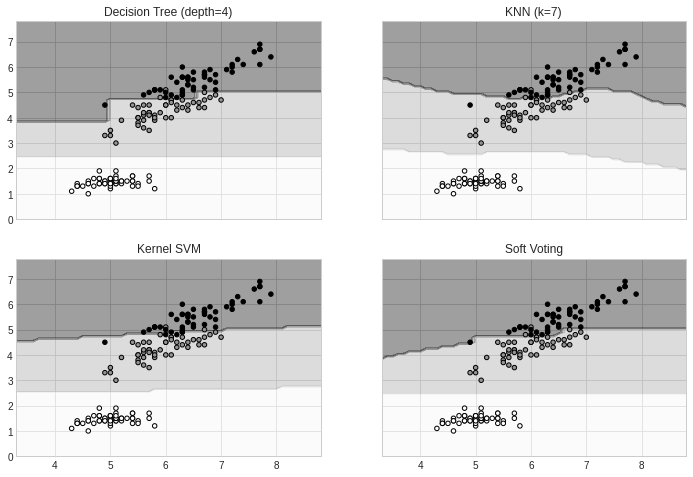

In [136]:
f, axarr = plt.subplots(2,2,sharex='col', sharey='row', figsize=(12,8))

for idx, model, tt in zip(product([0,1],[0,1]), [model1, model2, model3, vote_model],
                          ['Decision Tree (depth=4)', 'KNN (k=7)','Kernel SVM', 'Soft Voting']):
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
  axarr[idx[0], idx[1]].scatter(X[:,0], X[:,1], c=y, s=20, edgecolor='k')
  axarr[idx[0], idx[1]].set_title(tt)

plt.show()

## 투표 기반 회귀 (Voting Regressor)

* 서로 다른 모델의 예측 값의 평균을 사용

In [138]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor

In [139]:
model1 = LinearRegression()
model2 = GradientBoostingRegressor()
model3 = RandomForestRegressor()
vote_model = VotingRegressor(
    estimators=[('linear',model1),('gbr',model2),('rfr',model3)],
    weights=[1,1,1]
)

In [143]:
for model in (model1, model2, model3, vote_model):
  model_name = str(type(model)).split(".")[-1][:-2]
  scores = cross_val_score(model, boston.data, boston.target, cv=5)
  print('R2: %0.2f (+/- %0.2f) [%s]' % (scores.mean(), scores.std(), model_name))

R2: 0.35 (+/- 0.38) [LinearRegression]
R2: 0.68 (+/- 0.16) [GradientBoostingRegressor]
R2: 0.61 (+/- 0.22) [RandomForestRegressor]
R2: 0.65 (+/- 0.21) [VotingRegressor]


### 회귀식 시각화

In [144]:
X = boston.data[:,0].reshape(-1,1)
y = boston.target

In [145]:
model1 = LinearRegression()
model2 = GradientBoostingRegressor()
model3 = RandomForestRegressor()
vote_model = VotingRegressor(
    estimators=[('linear',model1),('gbr',model2),('rfr',model3)],
    weights=[1,1,1]
)

model1 = model1.fit(X, y)
model2 = model2.fit(X, y)
model3 = model3.fit(X, y)
vote_model = vote_model.fit(X, y)

In [147]:
x_min, x_max = X.min()-1, X.max()+1
xx = np.arange(x_min-1, x_max+1, 0.1)

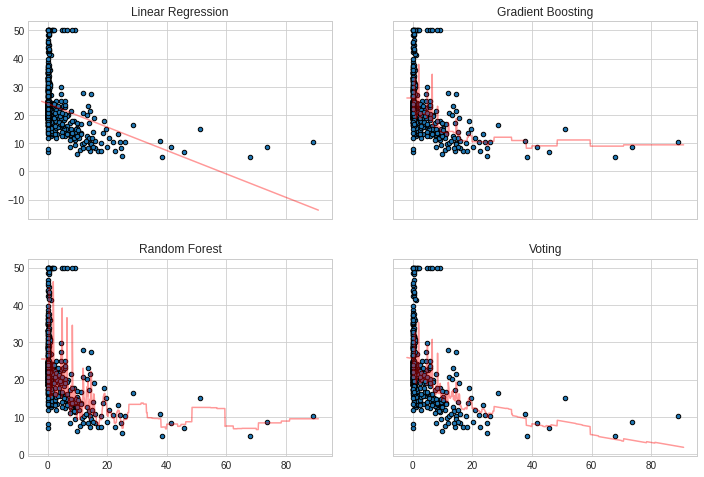

In [152]:
f, axarr = plt.subplots(2,2,sharex='col', sharey='row', figsize=(12,8))

for idx, model, tt in zip(product([0,1],[0,1]), [model1, model2, model3, vote_model],
                          ['Linear Regression', 'Gradient Boosting','Random Forest', 'Voting']):
  Z = model.predict(xx.reshape(-1,1))

  axarr[idx[0], idx[1]].plot(xx, Z, alpha=0.4, color='r')
  axarr[idx[0], idx[1]].scatter(X, y, s=20, edgecolor='k')
  axarr[idx[0], idx[1]].set_title(tt)

plt.show()

## 스택 일반화 (Stacked Generalization)

* 각 모델의 예측 값을 최종 모델의 입력으로 사용
* 모델의 편향을 줄이는데 효과적

### 스택 회귀

In [153]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor

In [154]:
estimators = [('ridge', Ridge()), ('lasso', Lasso()),('svr', SVR())]

In [155]:
reg = make_pipeline(
    StandardScaler(), StackingRegressor(estimators=estimators, final_estimator=GradientBoostingRegressor())
)

In [157]:
cross_val = cross_validate(
    estimator=reg,
    X = boston.data, y = boston.target, cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.3872252941131592 (+/- 0.04918701024803599)
avg score time: 0.009817075729370118 (+/- 0.003879320665870544)
avg test time: 0.32272887637734693 (+/- 0.3316277456661763)


#### 회귀식 시각화

In [158]:
X = boston.data[:,0].reshape(-1,1)
y = boston.target

In [159]:
model1 = Ridge()
model2 = Lasso()
model3 = SVR()
reg = StackingRegressor(estimators=estimators, final_estimator=GradientBoostingRegressor())

model1 = model1.fit(X, y)
model2 = model2.fit(X, y)
model3 = model3.fit(X, y)
reg = reg.fit(X, y)

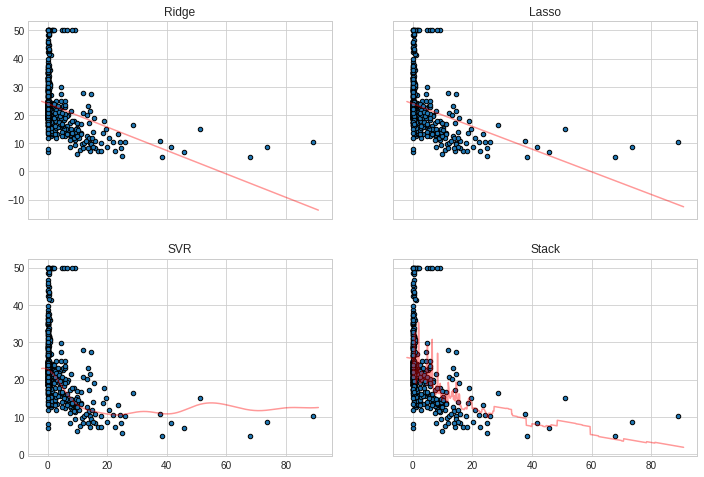

In [160]:
f, axarr = plt.subplots(2,2,sharex='col', sharey='row', figsize=(12,8))

for idx, model, tt in zip(product([0,1],[0,1]), [model1, model2, model3, vote_model],
                          ['Ridge', 'Lasso','SVR', 'Stack']):
  Z = model.predict(xx.reshape(-1,1))

  axarr[idx[0], idx[1]].plot(xx, Z, alpha=0.4, color='r')
  axarr[idx[0], idx[1]].scatter(X, y, s=20, edgecolor='k')
  axarr[idx[0], idx[1]].set_title(tt)

plt.show()

### 스택 분류

In [167]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier

In [169]:
estimators = [('logistic', LogisticRegression(max_iter=10000)),('svc', SVC()),('naive', GaussianNB())]

In [170]:
clf = StackingClassifier(
    estimators=estimators, final_estimator = RandomForestClassifier())

In [171]:
cross_val = cross_validate(
    estimator=clf,
    X = iris.data, y = iris.target, cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.3506780624389648 (+/- 0.013486163377056342)
avg score time: 0.013775253295898437 (+/- 0.0017521734288619881)
avg test time: 0.9666666666666666 (+/- 0.02108185106778919)


#### 결정 경계 시각화

In [174]:
X = iris.data[:, [0,2]]
y = iris.target

In [175]:
model1 =LogisticRegression(max_iter=10000)
model2 = SVC()
model3 = GaussianNB()
stack = StackingClassifier(estimators=estimators, final_estimator=RandomForestClassifier())

model1 = model1.fit(X, y)
model2 = model2.fit(X, y)
model3 = model3.fit(X, y)
stack = stack.fit(X, y)

In [176]:
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1

xx,yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

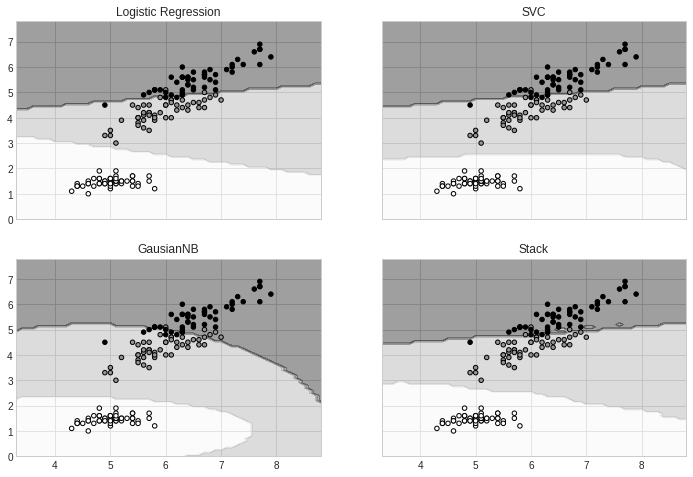

In [177]:
f, axarr = plt.subplots(2,2,sharex='col', sharey='row', figsize=(12,8))

for idx, model, tt in zip(product([0,1],[0,1]), [model1, model2, model3, stack],
                          ['Logistic Regression', 'SVC','GausianNB', 'Stack']):
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
  axarr[idx[0], idx[1]].scatter(X[:,0], X[:,1], c=y, s=20, edgecolor='k')
  axarr[idx[0], idx[1]].set_title(tt)

plt.show()